In [15]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [16]:
dataset_path = os.getcwd()
dataset_path += "\\A_Z Handwritten Data.csv"
dataset_path_path = os.path.abspath(dataset_path)

df = pd.read_csv(dataset_path)

# print first 5 rows
df.head(5)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## DATA PREPROCESSING

In [17]:
# extract class labels into separate dataframe
class_column = df['0']
del df['0']

In [18]:
class_column_letters = class_column.replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])

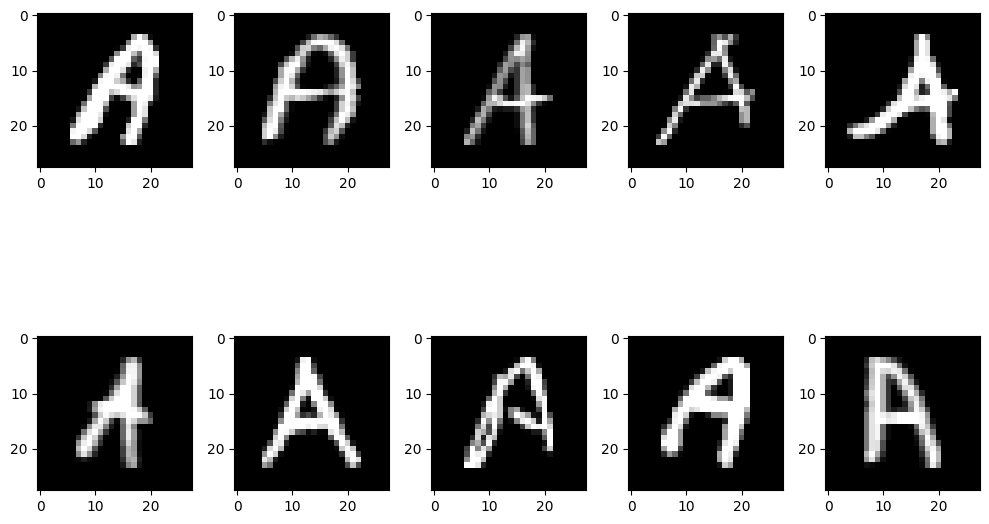

In [19]:
X_data = np.array(df)
X_data = X_data.reshape(-1,28,28,1)

f, ax = plt.subplots(2,5)
f.set_size_inches(10,10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_data[k].reshape(28,28), cmap='gray')
        k += 1
    plt.tight_layout()

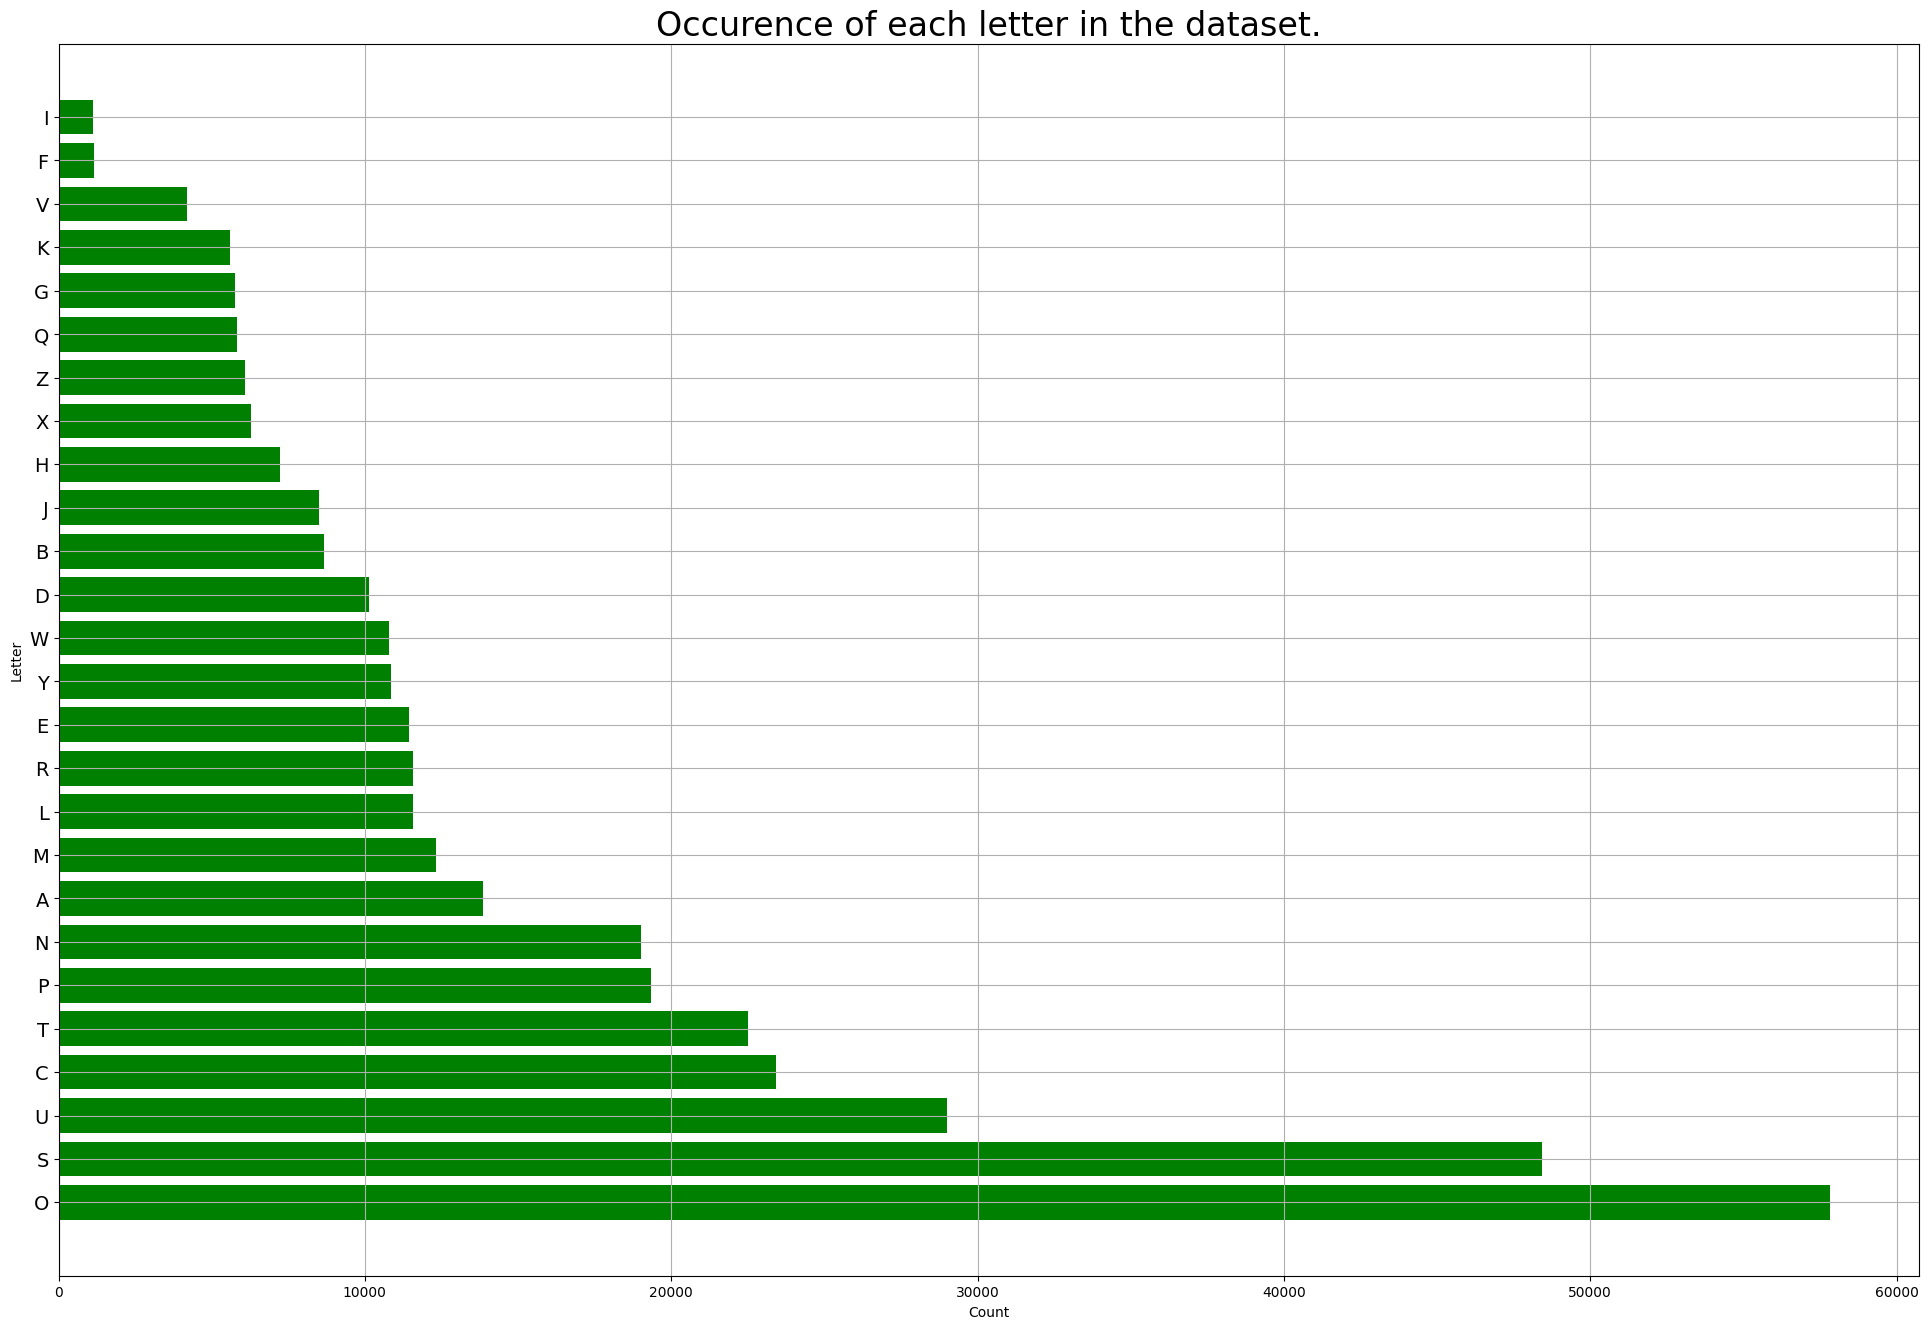

In [20]:
alphabet = ['O', 'S', 'U', 'C' , 'T' , 'P' , 'N', 'A', 'M', 'L', 'R', 'E', 'Y', 'W', 'D', 'B', 'J', 'H', 'X', 'Z', 'Q', 'G', 'K', 'V', 'F', 'I']
counts = class_column_letters.value_counts()

fig, ax = plt.subplots(1, 1, figsize=(24, 16))
ax.barh(alphabet, counts, color='green',)

plt.xlabel('Count')
plt.ylabel('Letter')
plt.yticks(fontsize=14)
plt.title('Occurence of each letter in the dataset.', fontsize=24)
plt.grid()
plt.show()

#### Split dataset into training and testing df

In [21]:
X = df
y = class_column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (260715, 784)
y_train shape: (260715,)
X_test shape: (111735, 784)
y_test shape: (111735,)


In [22]:
# Reshape the input data to a 4D tensor (batch_size, height, width, channels)
X_train = np.array(X_train).reshape(-1, 28, 28, 1)
X_test = np.array(X_test).reshape(-1, 28, 28, 1)

In [23]:
# One-hot encode the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#### CNN model

In [24]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/3
8148/8148 [==============================] - 195s 23ms/step - loss: 0.1554 - accuracy: 0.9601 - val_loss: 0.0796 - val_accuracy: 0.9786
Epoch 2/3
8148/8148 [==============================] - 171s 21ms/step - loss: 0.0729 - accuracy: 0.9796 - val_loss: 0.0692 - val_accuracy: 0.9820
Epoch 3/3
8148/8148 [==============================] - 166s 20ms/step - loss: 0.0570 - accuracy: 0.9838 - val_loss: 0.0511 - val_accuracy: 0.9860


In [25]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

3492/3492 [==============================] - 22s 6ms/step - loss: 0.0511 - accuracy: 0.9860
Test accuracy: 0.9860026240348816
